In [1]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import json
import csv
import os.path

 
# Fetch the service account key JSON file contents
cred = credentials.Certificate('nmbu-b421b-firebase-adminsdk-g2wnw-0cbc120783.json')
 
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://nmbu-b421b.firebaseio.com/'
})

file_exists = os.path.isfile('firebase_file.csv')

fieldnames_friendly = ['d', 't', 'PV panel', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'] 
fieldnames_working = ['d', 't', '3a0038000851353531343431', '310042000b47363339343638', '21001d000c47363339343638', '2c0024000c47363339343638', '420024000347363339343638']  

firebase_file = open('firebase_file.csv', 'a', newline='') 
csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_friendly) 
     
if not file_exists:
    csv_writer.writeheader()

csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_working) 

NMBUref = db.reference('NMBUdata')
NMBUdat = NMBUref.get()
d = {}
for dat in NMBUdat:
    d.update({'d': dat})
    for hou in NMBUdat[dat]:
        delete_user_ref = NMBUref.child(dat).child(hou)
        for tim in NMBUdat[dat][hou]:
            d.update({'t': tim}) 
            for ent in NMBUdat[dat][hou][tim]:
                d.update(NMBUdat[dat][hou][tim][ent])
            csv_writer.writerow(d)
            d = {}
        #delete_user_ref.delete() #uncomment if you want to delete backuped data from database
        
df = pd.read_csv('firebase_file.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1]:
df.to_csv('master_measurments_17_03_2021.csv')
df

NameError: name 'df' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('master_measurments_17_03_2021.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,d,t,PV panel,sensor 1,sensor 2,sensor 3,sensor 4
0,0,120121.0,114443,NaN,"100,100,100,100,100,100,100,100,100,100,100,10...",NaN,NaN,NaN
1,1,NaN,114444,NaN,"100,100,100,100,100,100,100,100,100,100,100,10...","200,200,200,200,200,200,200,200,200,200,200,20...",NaN,"400,400,400,400,400,400,400,400,400,400,400,40..."
2,2,NaN,114445,NaN,"100,100,100,100,100,100,100,100,100,100,100,10...","200,200,200,200,200,200,200,200,200,200,200,20...",NaN,"400,400,400,400,400,400,400,400,400,400,400,40..."
3,3,NaN,114446,NaN,"100,100,100,100,100,100,100,100,100,100,100,10...","200,200,200,200,200,200,200,200,200,200,200,20...",NaN,"400,400,400,400,400,400,400,400,400,400,400,40..."
4,4,NaN,114447,NaN,"100,100,100,100,100,100,100,100,100,100,100,10...","200,200,200,200,200,200,200,200,200,200,200,20...",NaN,"400,400,400,400,400,400,400,400,400,400,400,40..."
...,...,...,...,...,...,...,...,...
196052,196052,NaN,141911,NaN,"714.6,714.2,714.2,714.6,715.3,715.3,715.3,715....","653.8,653.8,653.5,653.5,653.5,653.2,653.2,652....","645.4,645.4,645.7,645.7,645.7,646.1,646.1,646....","645.9,646.6,645.9,646.3,645.9,646.3,645.9,646...."
196053,196053,NaN,141912,NaN,"717.1,717.1,717.4,718.1,717.8,717.8,718.5,718....","655.5,655.5,655.8,655.8,655.5,655.8,656.8,656....","647.7,648.3,648,648.3,648.3,648.3,648.7,648.7,...","646.3,646.6,646.6,646.6,646.3,646.3,646.3,645...."
196054,196054,NaN,141913,NaN,"721,720.6,720.6,721.4,720.6,720.3,721.4,722.4,...","656.4,656.8,657.4,657.4,657.7,658.4,658.4,658....","649.6,649.6,650.3,650,649.6,650.3,650.3,650,65...","646.3,646.6,646.6,647.3,646.9,646.9,647.9,647...."
196055,196055,NaN,141914,NaN,"722.4,722.4,721.7,722.1,722.4,722.1,722.1,722....","659,659,659,659.7,659.4,660,660,660,660.4,660,...","651.6,651.6,651.2,651.9,651.9,652.5,652.5,652....","648.6,648.6,648.6,648.6,648.9,648.9,649.2,648...."


## Direction south, distance 1060 m

In [4]:
df['d'].unique()

array([1.20121e+05,         nan, 9.99000e+02, 1.03210e+04, 2.03210e+04,
       1.60321e+05, 9.99999e+05, 1.70321e+05])

In [5]:
start_1 = df.loc[df['d'] == 170321.].index[0]
#end_1 = df.loc[df['d'] == 10321.].index[1]

date_17032021 = df.loc[start_1:]
date_17032021 = date_17032021.reset_index()
date_17032021 = date_17032021.iloc[:16559]
date_17032021.drop(['PV panel', 'index', 'd', 'Unnamed: 0'], axis=1, inplace=True)
date_17032021

,t,sensor 1,sensor 2,sensor 3,sensor 4
0,94326,"1059.4,1059.1,1059.4,1059.4,1059.4,1059.4,1059...","960.5,960.5,960.5,960.5,960.2,960.2,960.2,959....","948.6,948.2,947.6,947.9,947.6,947.9,947.6,948....","948.3,949,948.7,949,949.7,949,948.7,948.7,948...."
1,94327,"1059.8,1059.8,1059.1,1060.5,1059.4,1059.4,1059...","960.5,959.8,959.5,960.2,959.8,959.8,959.8,959....","948.2,947.9,947.9,948.2,948.6,948.6,948.2,948....","948,948.3,947.7,948.7,948.3,948.7,947.7,947.4,..."
2,94328,"1060.5,1060.9,1061.2,1060.1,1060.5,1060.5,1060...","959.8,958.9,958.9,959.5,960.5,959.8,959.8,958....","948.2,947.9,947.9,947.9,947.9,947.6,947.3,947....","948.3,948.3,948.7,948.7,948.7,948.7,948.7,948...."
3,94329,"1060.9,1060.5,1060.5,1060.5,1060.9,1060.5,1059...","959.5,960.2,960.5,960.5,960.2,960.5,959.8,960....","947.9,948.2,948.6,948.6,948.6,948.9,948.6,949....","949.3,949.3,949.7,949.3,949.3,949.7,948.7,949...."
4,94330,"1060.5,1060.1,1060.9,1061.9,1059.8,1061.6,1060...","960.8,960.5,960.8,959.8,960.8,961.1,961.1,960....","948.6,948.9,948.6,948.6,948.9,948.9,948.6,949....","949.3,949,949,949,948.3,948.3,949,948.7,948.7,..."
...,...,...,...,...,...
16554,141920,"738.4,738.4,738.1,739.1,738.8,739.1,738.8,739....","674.1,674.4,673.1,673.7,672.8,674.1,674.1,673....","666.8,666.1,666.8,667.1,667.7,667.1,666.8,668....","650.2,650.2,649.9,650.5,650.5,649.9,649.9,649...."
16555,141921,"740.9,740.2,740.6,741.3,742,741.3,740.6,741.3,...","675.7,675.4,675.4,675.7,675.4,676,676,675.7,67...","669.7,667.4,669,669,670.3,669,667.7,669.4,670....","648.2,648.2,648.6,648.2,648.2,648.2,648.2,647...."
16556,141922,"743.1,743.1,743.1,742.7,742.7,742.7,743.1,743....","676.4,676.4,676.4,676.7,677,676.7,675.7,677,67...","670.3,671,670.7,669.7,669.7,670.3,670.3,670,67...","646.3,646.9,646.6,646.6,646.3,646.3,645.6,645...."
16557,141923,"744.1,743.8,743.8,744.1,744.1,744.8,743.4,744....","676.7,677.7,676,676.4,676.4,676.7,677,676.4,67...","671,670.7,671,671,670.3,670.3,670.7,670.7,671,...","644.6,644.6,644.6,644.9,644.9,644.6,644.6,644...."


In [6]:
date_17032021.loc[date_17032021['t'] == 94326]

,t,sensor 1,sensor 2,sensor 3,sensor 4
0,94326,"1059.4,1059.1,1059.4,1059.4,1059.4,1059.4,1059...","960.5,960.5,960.5,960.5,960.2,960.2,960.2,959....","948.6,948.2,947.6,947.9,947.6,947.9,947.6,948....","948.3,949,948.7,949,949.7,949,948.7,948.7,948...."


In [7]:
nan_string = '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'
df_clean = date_17032021.fillna(nan_string)

In [8]:
def convert_data_format(df, columns=None):
    if columns == None:
        columns = ['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4', 'PV panel']
        
    val_dict = dict()
    for column in columns:
        val_dict[column] = []
        
    for row in range(0, len(df)):
        for key in val_dict:
            unpacked = [float(number) for number in str(df[key].iloc[row]).split(',')]
            if len(unpacked) < 20:
                print(row, key, len(unpacked))
                val_dict[key].append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            else:
                val_dict[key].append(unpacked)
    
    for key in val_dict:
        val_dict[key] = [item for sublist in val_dict[key] for item in sublist]
        
    #Make a new timestamp with higher resolution    
    time = list(df['t'])
    new_time = []

    for timestamp in time:
        for decimal in range(0, 20):
            new_time.append(timestamp + decimal/20)
    
    val_dict['time'] = new_time
    #Create a new dataframe with the new timestamps and values
    for key in val_dict.keys():
        print(key, len(val_dict[key]))
    new_frame = pd.DataFrame(val_dict)
    
    return new_frame

In [9]:
processed_data = convert_data_format(date_17032021, columns=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'])
processed_data

10856 sensor 2 1
10857 sensor 2 1
10858 sensor 2 1
10859 sensor 2 1
10860 sensor 2 1
10861 sensor 2 1
10862 sensor 2 1
10863 sensor 2 1
10864 sensor 2 1
10865 sensor 2 1
10866 sensor 2 1
10867 sensor 2 1
10868 sensor 2 1
10869 sensor 2 1
10870 sensor 2 1
10871 sensor 2 1
10872 sensor 2 1
10872 sensor 3 1
10873 sensor 2 1
10873 sensor 3 1
10874 sensor 2 1
10874 sensor 3 1
10875 sensor 2 1
10875 sensor 3 1
10876 sensor 2 1
10876 sensor 3 1
10877 sensor 2 1
10877 sensor 3 1
10878 sensor 2 1
10878 sensor 3 1
10879 sensor 2 1
10879 sensor 3 1
10880 sensor 3 1
10881 sensor 2 1
10881 sensor 3 1
10882 sensor 2 1
10882 sensor 3 1
10883 sensor 2 1
10883 sensor 3 1
10884 sensor 2 1
10884 sensor 3 1
10885 sensor 2 1
10885 sensor 3 1
10886 sensor 2 1
10886 sensor 3 1
10887 sensor 2 1
10887 sensor 3 1
10888 sensor 2 1
10888 sensor 3 1
10889 sensor 2 1
10889 sensor 3 1
10890 sensor 2 1
10890 sensor 3 1
10891 sensor 2 1
10891 sensor 3 1
10892 sensor 2 1
10892 sensor 3 1
10893 sensor 2 1
10893 sensor 3

,sensor 1,sensor 2,sensor 3,sensor 4,time
0,1059.4,960.5,948.6,948.3,94326.00
1,1059.1,960.5,948.2,949.0,94326.05
2,1059.4,960.5,947.6,948.7,94326.10
3,1059.4,960.5,947.9,949.0,94326.15
4,1059.4,960.2,947.6,949.7,94326.20
...,...,...,...,...,...
331175,744.5,678.0,672.3,643.3,141924.75
331176,744.1,678.6,672.0,644.0,141924.80
331177,745.2,677.3,672.0,643.6,141924.85
331178,744.8,677.3,672.0,643.6,141924.90


In [10]:
processed_data['time'] = processed_data['time'].add(10000)
processed_data

,sensor 1,sensor 2,sensor 3,sensor 4,time
0,1059.4,960.5,948.6,948.3,104326.00
1,1059.1,960.5,948.2,949.0,104326.05
2,1059.4,960.5,947.6,948.7,104326.10
3,1059.4,960.5,947.9,949.0,104326.15
4,1059.4,960.2,947.6,949.7,104326.20
...,...,...,...,...,...
331175,744.5,678.0,672.3,643.3,151924.75
331176,744.1,678.6,672.0,644.0,151924.80
331177,745.2,677.3,672.0,643.6,151924.85
331178,744.8,677.3,672.0,643.6,151924.90


In [11]:
def time_convert(time_column):
    import datetime as dt
    
    time_column = time_column.add(10000) # add an hour

    time_column = time_column.apply(lambda x: str(f'{x:.2f}').zfill(9))
    
    time_column = time_column.apply(lambda x: dt.datetime.strptime(x, '%H%M%S.%f').strftime('%H:%M:%S:%f'))
    
    time_column = pd.to_datetime(time_column, format=f'%H:%M:%S:%f').dt.time
    return time_column

processed_data['datetime'] = time_convert(processed_data['time'])
processed_data = processed_data[['datetime', 'time', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4']]
processed_data

,datetime,time,sensor 1,sensor 2,sensor 3,sensor 4
0,11:43:26,104326.00,1059.4,960.5,948.6,948.3
1,11:43:26.050000,104326.05,1059.1,960.5,948.2,949.0
2,11:43:26.100000,104326.10,1059.4,960.5,947.6,948.7
3,11:43:26.150000,104326.15,1059.4,960.5,947.9,949.0
4,11:43:26.200000,104326.20,1059.4,960.2,947.6,949.7
...,...,...,...,...,...,...
331175,16:19:24.750000,151924.75,744.5,678.0,672.3,643.3
331176,16:19:24.800000,151924.80,744.1,678.6,672.0,644.0
331177,16:19:24.850000,151924.85,745.2,677.3,672.0,643.6
331178,16:19:24.900000,151924.90,744.8,677.3,672.0,643.6


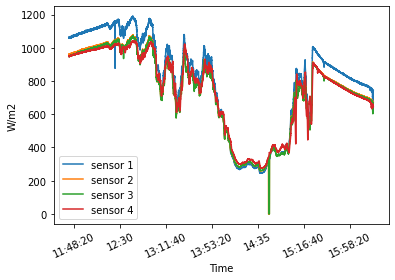

In [12]:
processed_data.plot(y=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'], x='datetime', rot=25)
plt.ylabel('W/m2')
plt.xlabel('Time')
plt.savefig('17_03_2021.png')

In [13]:
def define_mode(df, sensor, dP=700, dT=20):
    local_max = 0
    local_min = 0 
    max_index = 0
    min_index = 0
    interval = 0
    interval_list = []
    index_counter = df.index[0]
    while index_counter < df.index[-1]:
        #print(1)
        if interval >= 20*dT:
            local_max = 0
            local_min = 0
            interval = 0
            max_index = index_counter
            min_index = index_counter
            
        if local_max - local_min > dP:
            interval_list.append((min_index, max_index, max_index-min_index))
            local_max = 0
            local_min = 0
            interval = 0
            max_index = index_counter
            min_index = index_counter
            
        current_value = df[f'sensor {sensor}'][index_counter]
        if local_max == 0:
            local_max = current_value
        if local_min == 0:
            local_min = current_value
        
        if current_value > local_max:
            local_max = current_value
            max_index = index_counter
        
        if current_value < local_min:
            local_min = current_value
            min_index = index_counter
        
        index_counter += 1
        interval += 1
    return interval_list

[(122400, 122595, 195), (217440, 217396, -44), (218160, 218158, -2), (246115, 245900, -215), (246321, 246116, -205), (246388, 246683, 295), (246684, 246806, 122), (246807, 247070, 263), (257324, 257071, -253), (259568, 259326, -242), (264370, 264534, 164), (264535, 264666, 131), (264667, 265002, 335)]


(0.0, 1200.0)

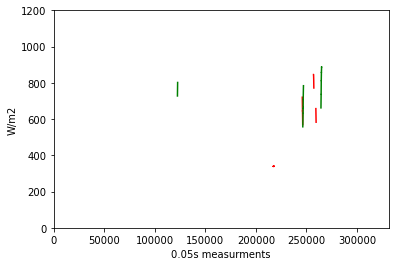

In [14]:
result = define_mode(processed_data, sensor=3, dP=75, dT=20)
print(result)
for entry in result:
    if entry[0] < entry[1]:
        processed_data['sensor 3'][entry[0]:entry[1]].plot(xlim=[0, len(processed_data)], c='g')
    else:
        processed_data['sensor 3'][entry[1]:entry[0]].plot(xlim=[0, len(processed_data)], c='r')
plt.xlabel('0.05s measurments')
plt.ylabel('W/m2')
plt.ylim([0, 1200])

,datetime,time,sensor 1,sensor 2,sensor 3,sensor 4
245900,15:08:21,140821.00,780.1,728.0,720.5,696.0
245901,15:08:21.050000,140821.05,779.7,727.6,720.2,696.0
245902,15:08:21.100000,140821.10,780.1,727.6,720.5,696.6
245903,15:08:21.150000,140821.15,779.7,727.6,720.5,696.6
245904,15:08:21.200000,140821.20,780.1,727.3,719.8,696.9
...,...,...,...,...,...,...
246110,15:08:31.500000,140831.50,707.5,659.4,647.4,637.1
246111,15:08:31.550000,140831.55,707.1,658.7,647.0,636.4
246112,15:08:31.600000,140831.60,706.8,658.7,646.4,636.1
246113,15:08:31.650000,140831.65,705.7,658.4,646.1,636.1


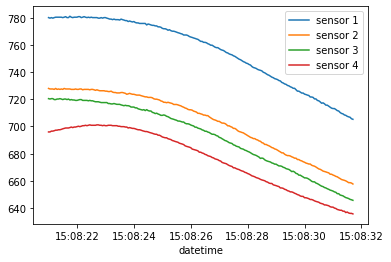

In [15]:
processed_data.iloc[245900:246115].plot(y=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'], ylim=None, x='datetime')
interval = processed_data.iloc[245900:246115]#.plot(y=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'])
#interval.to_csv('test_interval.csv')
interval

<ipython-input-16-d0e69bb7870c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'gradient{sensor}'] = np.gradient(df[f'sensor {sensor}'], dT)


Text(0, 0.5, 'd(W/m2) / dT')

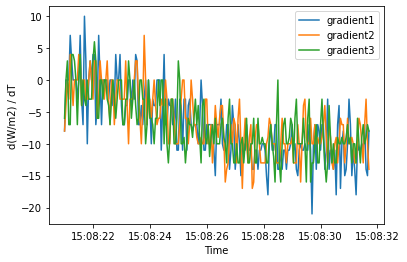

In [16]:
def calculate_gradients(df, dT=0.05):
    import numpy as np
    for sensor in [1, 2, 3, 4]:    
        df[f'gradient{sensor}'] = np.gradient(df[f'sensor {sensor}'], dT)
    return df

interval = calculate_gradients(interval)
interval.plot(y=[f'gradient{nr}' for nr in range(1,4)], x='datetime')
plt.xlabel('Time')
plt.ylabel('d(W/m2) / dT')
#plt.savefig('bad_derivatives.png')

R2 score: 0.9995801979186012


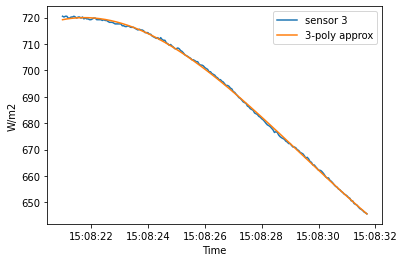

In [17]:
def reg_plot(df, sensor_nr, y_lim=None, plot=True):
    from sklearn.metrics import r2_score
    
    x = [x for x in range(df.index[0], df.index[-1]+1)]
    y =  df[f'sensor {sensor_nr}']
    
    reg_model = np.poly1d(np.polyfit(x, y, 3))
    if plot:
        df.plot(y=[f'sensor {sensor_nr}'], ylim=y_lim, x='datetime')
        plt.plot(df['datetime'], reg_model(x), label='3-poly approx')
        plt.legend()
        plt.ylabel('W/m2')
        plt.xlabel('Time')
        #plt.text('r', (0.5, 0.5), yxcoords='axes fraction')
    
    print('R2 score:', r2_score(y, reg_model(x)))
    return reg_model(x), r2_score(y, reg_model(x))

test3 = reg_plot(interval, 3)
plt.savefig('regline.png')

R2 score: 0.9992210953483084
R2 score: 0.9991406518953813
R2 score: 0.9995801979186012
R2 score: 0.9996098506516856
sensor 1 time 0.6
sensor 2 time 0.45
sensor 3 time 0.0
sensor 4 time 0.9


<ipython-input-20-cd2768d2f784>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-20-cd2768d2f784>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-20-cd2768d2f784>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

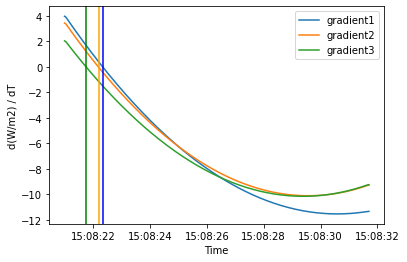

In [20]:
def fraction_point(gradient, frac=0.4):
    return min(gradient)+((1-frac)*(max(gradient)-min(gradient)))


def closest_point(gradient, tol=0.05):
    counter = 0
    while True:
        if abs(gradient[counter] - fraction_point(gradient)) <= tol:
            return gradient[counter]
        counter += 1


def find_time_diff(interval, increase=False, fraction=True, tol=0.15):
    sensor1, r2_1 = reg_plot(interval, 1, plot=False)
    gradient1 = np.gradient(sensor1, 0.05)
    interval['gradient1'] = gradient1
    
    sensor2, r2_2 = reg_plot(interval, 2, plot=False)
    gradient2 = np.gradient(sensor2, 0.05)
    interval['gradient2'] = gradient2

    sensor3, r2_3 = reg_plot(interval, 3, plot=False)
    gradient3 = np.gradient(sensor3, 0.05)
    interval['gradient3'] = gradient3
    
    sensor4, r2_4 = reg_plot(interval, 4, plot=False)
    gradient4 = np.gradient(sensor4, 0.05)
    interval['gradient4'] = gradient4

    if fraction:
        index1 = list(gradient1).index(closest_point(gradient1, tol=tol))
        index2 = list(gradient2).index(closest_point(gradient2, tol=tol)) 
        index3 = list(gradient3).index(closest_point(gradient3, tol=tol))
        index4 = list(gradient4).index(closest_point(gradient4, tol=tol))
    else:
        index1 = list(gradient1).index(min(gradient1, key=lambda x:abs(x-0)))
        index2 = list(gradient2).index(min(gradient2, key=lambda x:abs(x-0))) 
        index3 = list(gradient3).index(min(gradient3, key=lambda x:abs(x-0)))
        index4 = list(gradient4).index(min(gradient4, key=lambda x:abs(x-0)))
    
    the_list = [index1, index2, index3]
    
    for n in range(3):
        print(f'sensor {n+1} time', abs((min(the_list)-the_list[n])/20))
    print('sensor 4 time', abs((min(the_list)-index4)/20))

    interval.plot(y=[f'gradient{sensor}' for sensor in range(1,4)], x='datetime') #rot=25)
    plt.axvline(interval['datetime'].iloc[index1], c='b')
    plt.axvline(interval['datetime'].iloc[index2], c='orange')
    plt.axvline(interval['datetime'].iloc[index3], c='g')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('d(W/m2) / dT')
    plt.savefig('intersect.png')
    return index1, index2, index3, index4, (r2_1 + r2_2 + r2_3 + r2_4)/4

index1, index2, index3, index4, r2_avg = find_time_diff(interval, fraction=False)

Speed: 46.7 m/s, Direction: 171 deg (S)

In [17]:
1060/46.7

22.698072805139184

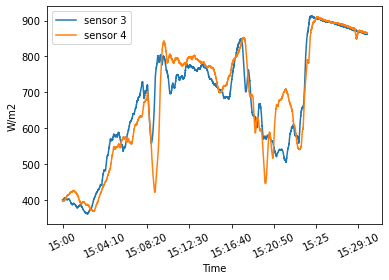

In [45]:
def plot_interval(df, start, stop, sensors=None):
    if sensors == None:
        sensors = [1, 2, 3, 4]
    sliced_data = df.loc[(stop > df['time']) & (df['time'] > start)]
    color_dict = {1: 'c', 2:'gold', 3:'g'}
    xs = [x for x in range(len(sliced_data))]
    sliced_data.plot(x='datetime', y=[f'sensor {sensor}' for sensor in sensors], rot=25)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('W/m2')
    
plot_interval(processed_data, 140000, 143000, sensors=[3, 4])
plt.savefig('reference.png')

Målinger fra sensor 3 og 4 mellom kl 14:00 og 14:30

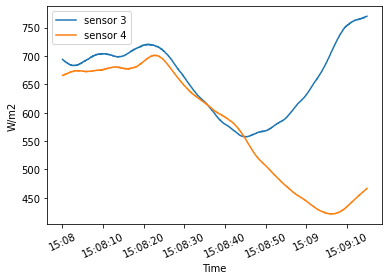

In [19]:
plot_interval(processed_data, 140800, 140915, sensors=[3, 4])
#plt.savefig('zoom.png')

In [20]:
(1100-700)/20 # actual time delay

20.0

In [21]:
1060/20 # actual speed

53.0

In [22]:
1060/46.7 # estimated time delay

22.698072805139184

Looking at another interval

,datetime,time,sensor 1,sensor 2,sensor 3,sensor 4
264370,15:23:44.500000,142344.50,718.9,658.4,661.9,616.7
264371,15:23:44.550000,142344.55,719.2,658.4,662.2,617.3
264372,15:23:44.600000,142344.60,719.2,659.0,662.9,618.0
264373,15:23:44.650000,142344.65,719.2,658.7,662.2,618.3
264374,15:23:44.700000,142344.70,719.9,659.0,663.2,619.0
...,...,...,...,...,...,...
264997,15:24:15.850000,142415.85,971.5,884.4,886.4,783.8
264998,15:24:15.900000,142415.90,971.9,884.4,886.4,784.1
264999,15:24:15.950000,142415.95,971.9,885.0,886.8,783.8
265000,15:24:16,142416.00,973.0,885.0,887.1,783.8


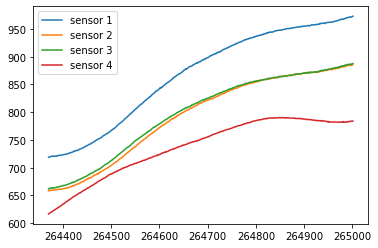

In [23]:
processed_data.iloc[264370:265002].plot(y=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'], ylim=None)
interval2 = processed_data.iloc[264370:265002]#.plot(y=['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'])
#interval.to_csv('test_interval.csv')
interval2

R2 score: 0.9949893454128079
R2 score: 0.9949339441571788
R2 score: 0.994844695577988
R2 score: 0.9970317674562288


<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

sensor 1 time 2.35
sensor 2 time 1.85
sensor 3 time 0.0
sensor 4 time 2.55


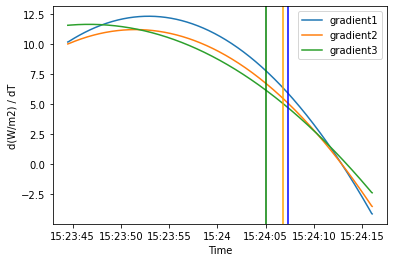

In [24]:
index5, index6, index7, index8, r2_avg = find_time_diff(interval2, increase=True)

Speed: 6.1 m/s, Direction: 132 deg (SE)

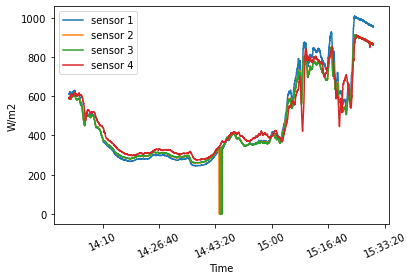

In [25]:
plot_interval(processed_data, 130000, 143000)

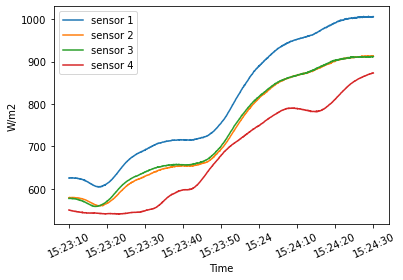

In [26]:
plot_interval(processed_data, 142310, 142430)

In [27]:
(1320-710)/20 # actual time delay

30.5

In [28]:
1060/30.5 # actual speed

34.75409836065574

In [29]:
(1060/6.1) # estimated time delay

173.7704918032787

In [36]:
def get_all_time_diff(df, tol=0.15, fraction=True, skip=None):
    time_diff_list = []
    r2_list = []
    for entry in result:
        temp_list = []
        if entry[2] >= 0:
            interval = df.iloc[entry[0]:entry[1]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, increase=True, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
            
        else:
            interval = df.iloc[entry[1]:entry[0]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
        time_diff_list.append(temp_list)
        r2_list.append(r2_avg)
    print('Average R2 score:', sum(r2_list)/len(result))
    return time_diff_list

R2 score: 0.9998574605253893
R2 score: 0.9998596283381503
R2 score: 0.9999040143346074
R2 score: 0.6419512774563643
sensor 1 time 0.3
sensor 2 time 0.2
sensor 3 time 0.0
sensor 4 time 0.6
R2 score: 0.1706900637953278
R2 score: 1.0
R2 score: 0.4989812535544236
R2 score: 0.7309482787196939
sensor 1 time 0.65
sensor 2 time 0.0
sensor 3 time 0.15
sensor 4 time 0.0


<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 1.0
R2 score: 0.0
R2 score: 1.0
R2 score: 1.0
sensor 1 time 0.0
sensor 2 time 0.0
sensor 3 time 0.0
sensor 4 time 0.0
R2 score: 0.9992210953483084
R2 score: 0.9991406518953813
R2 score: 0.9995801979186012
R2 score: 0.9996098506516856
sensor 1 time 0.3
sensor 2 time 0.05
sensor 3 time 0.0
sensor 4 time 0.3
R2 score: 0.9976436196766743
R2 score: 0.9981175178953066
R2 score: 0.99837340276343
R2 score: 0.9991048718207688
sensor 1 time 8.55
sensor 2 time 0.0
sensor 3 time 8.75
sensor 4 time 7.7
R2 score: 0.9980783166011654
R2 score:

<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9973225966333484
R2 score: 0.9977436106549598
R2 score: 0.9992004423474804
sensor 1 time 1.0
sensor 2 time 1.0
sensor 3 time 0.0
sensor 4 time 3.75


<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient3'] = gradient3
<ipython-input-16-ab1b38e3a70b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9995382458141517
R2 score: 0.9998079981373871
R2 score: 0.9998275597882613
R2 score: 0.9994534924972303
sensor 1 time 0.15
sensor 2 time 0.0
sensor 3 time 0.25
sensor 4 time 0.4
R2 score: 0.9985740506252367
R2 score: 0.9987841488076447
R2 score: 0.9981300051136304
R2 score: 

<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

0.9992974056594892
sensor 1 time 0.15
sensor 2 time 0.15
sensor 3 time 0.0
sensor 4 time 0.65
R2 score: 0.9997080549595907
R2 score: 0.9996268191924312
R2 score: 0.999774989405238
R2 score: 0.9903533327156434
sensor 1 time

<ipython-input-16-ab1b38e3a70b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient4'] = gradient4
<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.7
sensor 2 time 0.1
sensor 3 time 0.0
sensor 4 time 1.7
R2 score: 0.9997880551714001
R2 score: 0.9997358397672267
R2 score: 0.999627726766994
R2 score: 0.999620477011302
sensor 1 time 0.15
sensor 2 time 0.2
sensor 3 time 0.0
sensor 4 time 2.0


<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9997079668256217
R2 score: 0.9994195351657834
R2 score: 0.9997447423468822
R2 score: 0.9998047000005766
sensor 1 time 0.85
sensor 2 time 0.0
sensor 3 time 1.0
sensor 4 time 1.45
R2 score:

<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient3'] = gradient3
<ipython-input-16-ab1b38e3a70b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9997733977511953
R2 score: 0.9997773110154914
R2 score: 0.9996978879773964
R2 score: 0.9995054068620228
sensor 1 time 0.0
sensor 2 time 1.0
sensor 3 time 0.25
sensor 4 time 1.5
R2 score: 0.9983594803662005
R2 score: 0.9982540553817304


<ipython-input-16-ab1b38e3a70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-16-ab1b38e3a70b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-16-ab1b38e3a70b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9985704349181581
R2 score: 0.9811269839131439
sensor 1 time 0.5
sensor 2 time 0.3
sensor 3 time 0.0
sensor 4 time 1.8
Average R2 score: 0.9419368895170792


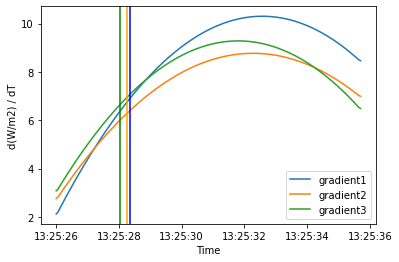

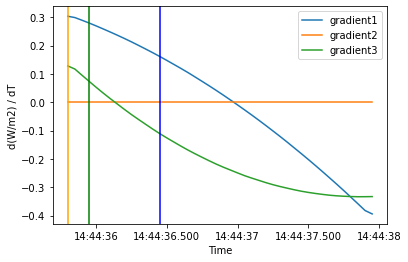

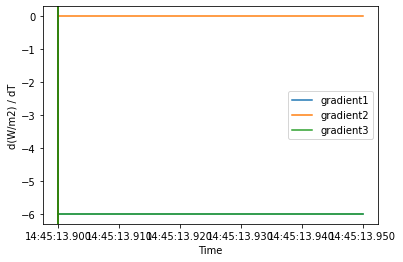

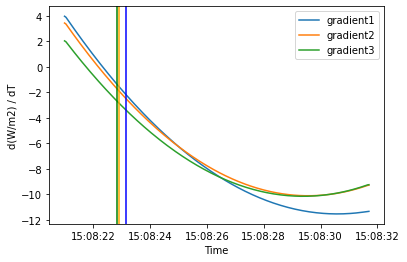

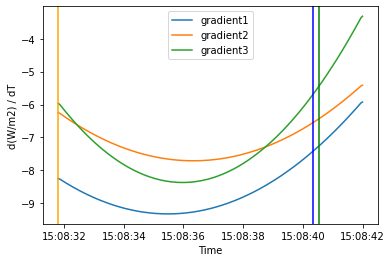

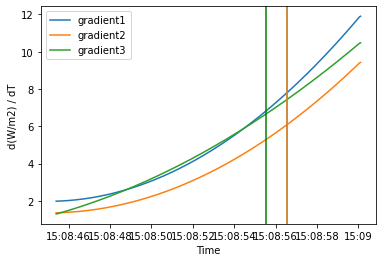

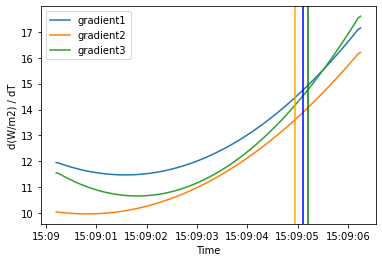

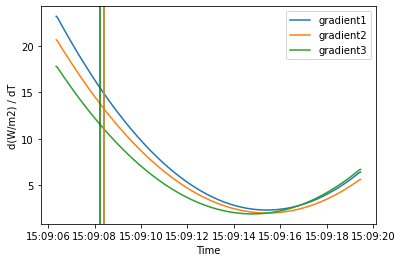

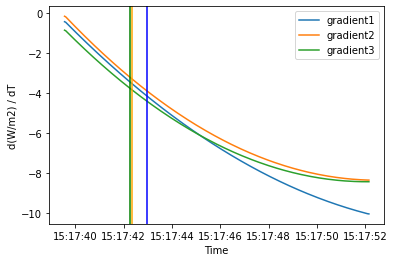

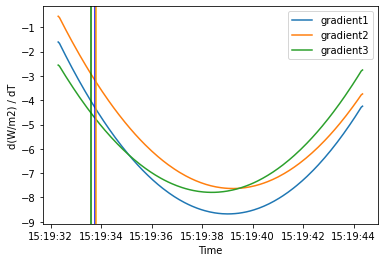

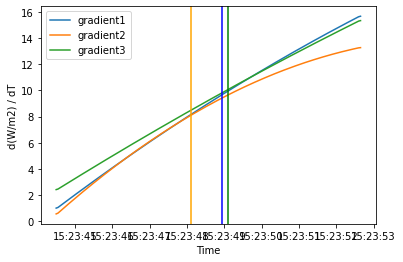

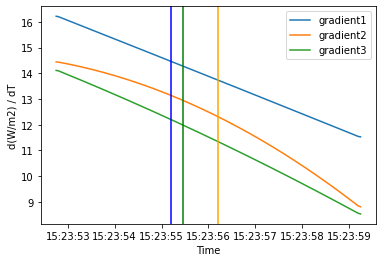

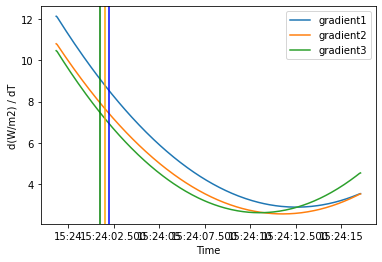

In [37]:
time_diffs = get_all_time_diff(processed_data, fraction=True)

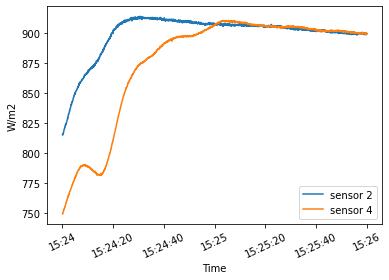

In [82]:
plot_interval(processed_data, 142400, 142600, sensors=[2, 4])

In [33]:
from math import sin, cos, acos, asin, degrees, radians, sqrt, atan
from statistics import median
import matplotlib.pyplot as plt


def calculate_angle(mid_time, end_time, distance):
    over = end_time*distance - mid_time*distance*cos(radians(60))
    under = mid_time*distance*sin(radians(60))
    return degrees(atan((over/under)))


def triangulate(a_time, b_time, c_time):
    distance = 15
    
    time_dict = {'A': a_time, 'B': b_time, 'C': c_time}
    
    start_point = min(time_dict, key=time_dict.get)
    start_time = time_dict[start_point]
    
    end_point = max(time_dict, key=time_dict.get)
    end_time = time_dict[end_point] - start_time
    
    time_dict.pop(start_point)
    time_dict.pop(end_point)
    
    mid_point = max(time_dict, key=time_dict.get)
    mid_time = time_dict[mid_point] - start_time
    
    print(f'{start_point}:{start_time} | {mid_point}:{mid_time} | {end_point}:{end_time}')
   
    angle = calculate_angle(mid_time, end_time, distance)
    
    if start_point == 'A':
        if b_time <= c_time:
            north = 30
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 330
            angle = calculate_angle(mid_time, end_time, distance)
    
    elif start_point == 'B':
        if a_time <= c_time:
            north = 210
            angle = calculate_angle(mid_time, end_time, distance)
        else:
            north = 270
            angle = -calculate_angle(mid_time, end_time, distance)
        
    elif start_point == 'C':
        if a_time <= b_time:
            north = 150
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 90
            angle = calculate_angle(mid_time, end_time, distance)
    
    speed = (distance*cos(radians(angle)))/mid_time
    
    if 0 < north + angle < 360:
        angle_north = north + angle

    elif north + angle < 0:
        angle_north = north + angle + 360
    
    else:
        angle_north = north + angle - 360
    
    print(f'Starts in {start_point}, angle:{angle:.2f}, angle north:{angle_north:.2f}, speed:{speed:.2f} m/s')
    
    height = (sqrt(3)/2)*distance
    y_centre = height - ((distance/2)**2)/((distance*sqrt(3))/2)
    
    plt.quiver(0, y_centre, (sin(radians(north+angle))), cos(radians(north+angle)), scale=7)
    xs = [-distance/2, 0, distance/2, -distance/2]
    ys = [sqrt(distance**2 - (distance/2)**2), 0, sqrt(distance**2 - (distance/2)**2), sqrt(distance**2 - (distance/2)**2)]
    
    plt.plot(xs, ys)
    plt.scatter(xs, ys, color='red')
    
    plt.text(-distance/2, height-height/10, '3', color='g')
    plt.text(-0.1, height/10, '1', color='g')
    plt.text(distance/2, height-height/10, '2', color='g')
    plt.axis('equal')
    plt.show()
    return angle_north, speed

C:0.0 | B:0.2 | A:0.3
Starts in C, angle:49.11, angle north:139.11, speed:49.10 m/s


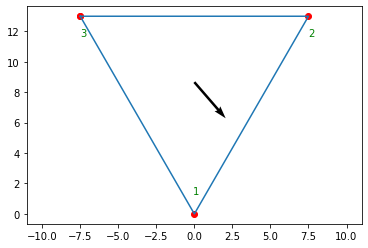

B:0.0 | C:0.15 | A:0.65
Starts in B, angle:-77.27, angle north:192.73, speed:22.04 m/s


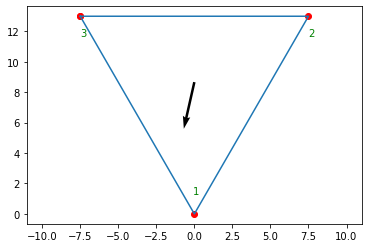

C:0.0 | B:0.05 | A:0.3
Starts in C, angle:81.05, angle north:171.05, speed:46.66 m/s


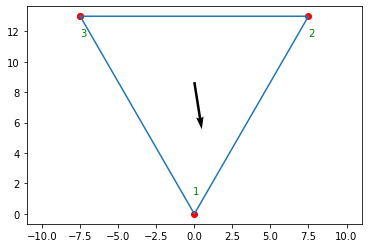

B:0.0 | A:8.55 | C:8.75
Starts in B, angle:31.15, angle north:241.15, speed:1.50 m/s


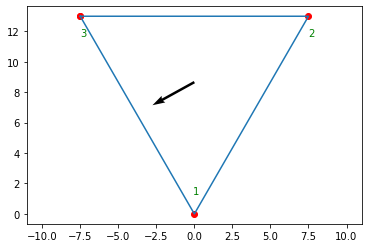

C:0.0 | B:1.0 | A:1.0
Starts in C, angle:-30.00, angle north:120.00, speed:12.99 m/s


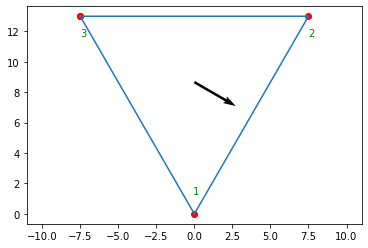

B:0.0 | A:0.15 | C:0.25
Starts in B, angle:53.41, angle north:263.41, speed:59.60 m/s


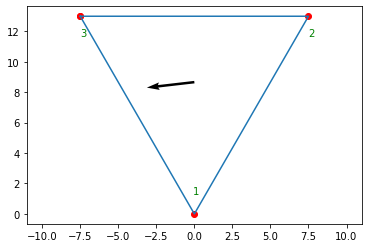

C:0.0 | B:0.15 | A:0.15
Starts in C, angle:-30.00, angle north:120.00, speed:86.60 m/s


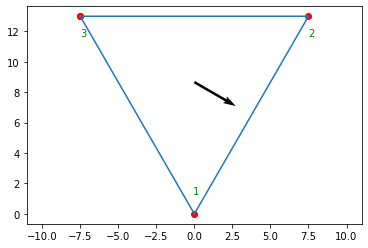

C:0.0 | B:0.1 | A:0.7
Starts in C, angle:82.41, angle north:172.41, speed:19.81 m/s


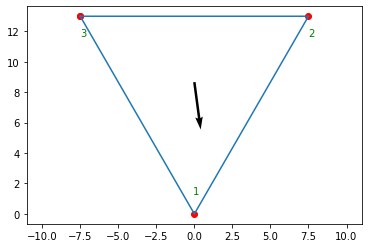

C:0.0 | A:0.15 | B:0.2
Starts in C, angle:-43.90, angle north:106.10, speed:72.06 m/s


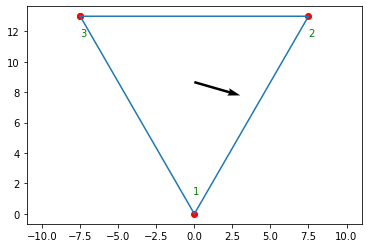

B:0.0 | A:0.85 | C:1.0
Starts in B, angle:37.99, angle north:247.99, speed:13.91 m/s


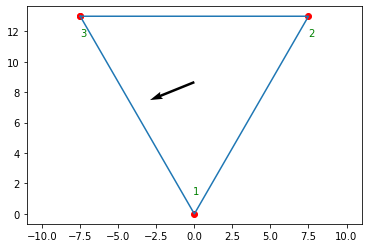

A:0.0 | C:0.25 | B:1.0
Starts in A, angle:76.10, angle north:46.10, speed:14.41 m/s


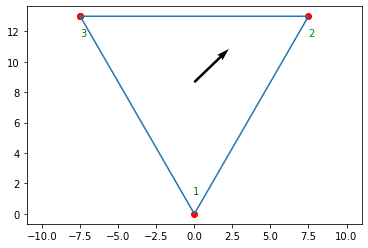

C:0.0 | B:0.3 | A:0.5
Starts in C, angle:53.41, angle north:143.41, speed:29.80 m/s


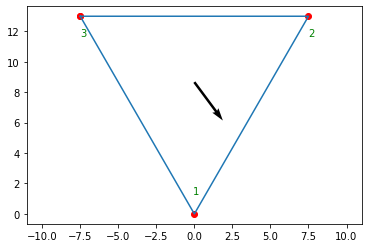

avg angle: 165.07411781051428 std: 65.74966865227722
avg speed: 39.34583347849189 std: 26.525615976580422


In [38]:
triang_speeds = []
triang_angles = []
for entry in time_diffs:
    if not ((entry[0] == 0) and (entry[1] == 0)):
        if not (entry[1] == 0 and entry[2] == 0):
            if not (entry[2] == 0 and entry[0] == 0):
                angle, speed = triangulate(entry[0], entry[1], entry[2])
                triang_angles.append(angle)
                triang_speeds.append(speed)

del(triang_speeds[1],triang_speeds[3])
del(triang_angles[1],triang_angles[3])
print('avg angle:', sum(triang_angles)/len(triang_angles), 'std:', np.std(triang_angles))
print('avg speed:', sum(triang_speeds)/len(triang_speeds), 'std:', np.std(triang_speeds))

In [35]:
(26.5/39.35) * 27

18.182973316391358